# Réseaux de neurones

In [8]:
import numpy as np
import math
import torch
import matplotlib.pyplot as plt
from tme5 import CirclesData
from tme5 import MNISTData
from random import gauss 

In [9]:
def init_model(nx, nh, ny, eta): 
    model = torch.nn.Sequential(
        torch.nn.Linear(nx, nh),
        torch.nn.ReLU(),
        torch.nn.Linear(nh, ny),
        torch.nn.Sigmoid()
        )
    loss = torch.nn.MSELoss()
    optim = torch.optim.SGD(model.parameters(), lr=eta)
    return model, loss, optim

Loss in Test 0.44508522748947144


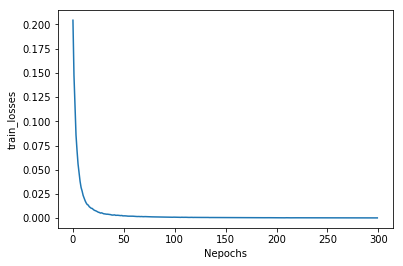

In [10]:
if __name__ == '__main__':
    data = CirclesData()
    #data.plot_data()
    N = data.Xtrain.shape[0]
    Nbatch = 10
    nx = data.Xtrain.shape[1]
    nh = 10
    ny = data.Ytrain.shape[1]
    eta = 0.03
    data.Xtrain.requires_grad = True
    data.Ytrain.requires_grad = True
    model, loss, optim = init_model(nx, nh, ny,eta)
    Nepoch = 300 
    train_losses = []
    for i in range(Nepoch): 
        for j in range (int(N/Nbatch)):
            ind = np.random.randint(0,data.Xtrain.shape[1],Nbatch) 
            Xbatch = data.Xtrain[ind]
            Ybatch = data.Ytrain[ind]
            Yhat = model(Xbatch)
            L = loss(Yhat, Ybatch)
            optim.zero_grad()
            L.backward()
            optim.step() 
        train_losses.append(L.item())   

    ypred = model(data.Xtest)
    l = loss(ypred, data.Ytest)
    print("Loss in Test",l.item())
    plt.plot(np.arange(Nepoch),train_losses)
    plt.ylabel('train_losses')
    plt.xlabel('Nepochs')
    plt.show() 
    



In [15]:
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 500
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03
data.Xtrain.requires_grad = True
data.Ytrain.requires_grad = True
model, loss, optim = init_model(nx, nh, ny,eta)
Nepoch = 300 
train_losses = []
for i in range(Nepoch): 
    for j in range (int(N/Nbatch)):
        ind = np.random.randint(0,data.Xtrain.shape[1],Nbatch) 
        Xbatch = data.Xtrain[ind]
        Ybatch = data.Ytrain[ind]
        Yhat = model(Xbatch)
        L = loss(Yhat, Ybatch)
        optim.zero_grad()
        L.backward()
        optim.step() 
    train_losses.append(L.item())   

ypred = model(data.Xtest)
l = loss(ypred, data.Ytest)
print("Loss in Test",l.item())
plt.plot(np.arange(Nepoch),train_losses)
plt.ylabel('train_losses')
plt.xlabel('Nepochs')
plt.show() 





KeyboardInterrupt: 